# Implementación Autómatas finitos deterministas (AFD)

**Autómatas y Lenguajes Formales**

**Profesor: Fabio Martínez**

**Escuela de Ingeniería de Sistemas e Informática**   

<br><br>
<span style="text-decoration:underline;">Ejecute estas dos celdas si se encuentra trabajando en Colaboratory:</span>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/automatas-uis-student/notebooks
!pwd

In [ ]:
!pip install automata-lib==1.0.0.post4

<br><br>

## Autómata Finito Determinista (AFD)
### Implementación Manual autómata finito determinista
- <b>Ejemplo A</b><br>
Se desea diseñar un AFD que acepte el lenguaje
 
$$L=\{w \mid w \text{ tiene un número par de ceros y un número par de unos}\}$$

La tarea de los estados de este AFD es la de contar el número de ceros y el número de unos contando en módulo $2$. Es decir, el estado se emplea para recordar si el número de ceros es par o impar hasta el momento y también para recordar si el número de unos leídos hasta el momento es par o impar. Existen por tanto cuatro estados que pueden interpretarse de la manera siguiente:
- $q_0$: tanto el número de ceros como el de unos leídos hasta el momento es par. 
- $q_1$: el número de ceros leídos hasta el momento es par, pero el de unos es impar.
- $q_2$: tanto el número de ceros como el de unos leídos hasta el momento es impar.
- $q_3$: el número de unos leídos hasta el momento es par, pero el de ceros es impar.

El estado $q_0$ es tanto el estado incial como el único estado de aceptación. Es el estado inicial porque antes
de leer ninguna entrada, la cantidad de ceros y unos leídos hasta el momento es igual a cero y cero es par. Es
el único estado de aceptación porque describe de forma exacta la condición para que una secuencia de ceros y
unos pertenezca al lenguaje $L$.

Ahora ya sabemos cómo especificar el AFD para el lenguaje $L$. Así

$$A=(\{q_0,q_1,q_2,q_3\},\{0,1\},\delta,q_0,\{q_0\})$$

donde la función de transición $\delta$ se describe mediante el diagrama de transiciones de la siguiente figura

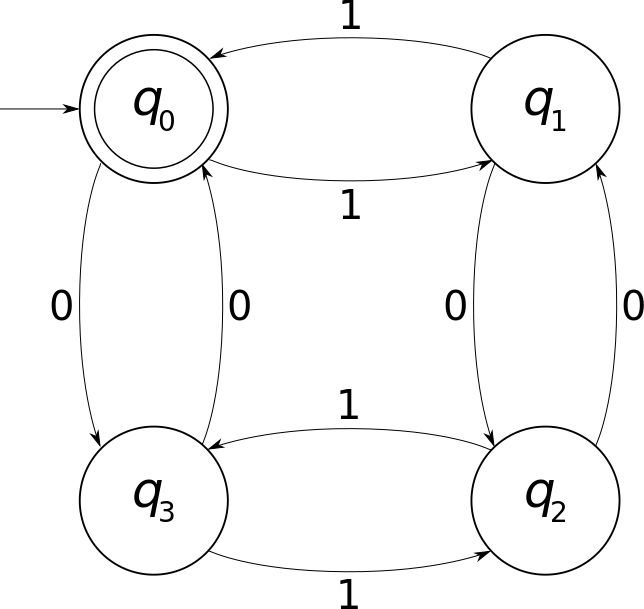

In [2]:
from IPython.display import Image
Image(filename='files/AFD1.png', width=300)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 1. Diagrama de transiciones del AFD 1</div>
</div>

#### Implementación usando automata-lib 
Se implementarán los mismos ejercicios pero útilizando la librería automata-lib

Para implementar el autómata finito determinista es necesario hacer el llamado a la función **DFA** pasando como argumentos:
- states: Estados del autómata definidos como cadenas
- input_symbols: Simbolos que generan las transiciones representados como cadenas
- transitions: Un diccinario con las transiciones para cada estado, aquí la clave será el estado en el que se posicione y el valor otro diccionario con las respectivas transiciones posibles.
- initial_state: El estado inicial representado como string
- final_states: Un conjunto de estados finales o de aceptación separadas por comas y como strings

In [1]:
#from automata.fa.dfa import DFA  #cuando se encuentre en colaboratory
from automatalib.fa.dfa import DFA  #cuando se encuentre en virtualbox
dfa1 = DFA(
    states={'q0', 'q1', 'q2', 'q3'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q3', '1': 'q1'},
        'q1': {'0': 'q2', '1': 'q0'},
        'q2': {'0': 'q1', '1': 'q3'},
        'q3': {'0': 'q0', '1': 'q2'}
        
    },
    initial_state='q0',
    final_states={'q0'}
)

Para validar el autómata implementado se hace mediante la el método **validate_input** del objeto **DFA** instanciado, pasando como argumento la cadena a evaluar en formato string

In [2]:
# Ejemplo, retorna el estado final en caso de estar bien implementado el autómata, caso contrario devuelve un error
print(dfa1.validate_input('11'))

q0


<span style="background-color:red;color:#fff;padding:4px;">Observación:</span> esta celda arrojará un error al ser ejecutada:

In [ ]:
print(dfa1.validate_input('111'))

Para manejar los errores se hace necesario utilizar las palabras del lenguaje python para manejo de excepciones las cuales son **try** y **except** y retorna porque es el error

In [ ]:
try:
    dfa1.validate_input('111') #11
except Exception as e:
        print("Entrada no valida: \n", e) 

Si al método **validate_input** se le pasa el valor **step=True** este me retornará la secuencia de estado que visita en caso de ser aceptada la cadena, de lo contrario dará una excepción

In [ ]:
list(dfa1.validate_input('11001010', step=True))

Viendo lo anterior se exploran las posibles excepciones para un autómata

In [13]:
#import automata.shared.exceptions as exceptions  #cuando se encuentre en colaboratory
import automatalib.shared.exceptions as exceptions  #cuando se encuentre en virtualbox
dir(exceptions)

['AutomatonError',
 'FinalStateError',
 'InitialStateError',
 'InvalidStateError',
 'InvalidSymbolError',
 'MissingStateError',
 'MissingSymbolError',
 'RejectionError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

La siguiente función nos ayudará a validar si una cadena es aceptada mostrando los estados por los que pasó y en caso contrario capturará el error por el cual la cadena no es aceptada

In [ ]:
def checker(cadena,DFA):
    try:
        DFA.validate_input(cadena)
        return "La cadena es aceptada: sus estados visitados fueron:",[step for step in DFA.validate_input(cadena, step=True)]
    except Exception as e:
        print("Entrada no valida: \n", e)  
    
checker('11',dfa1)  

#### Implementando el autómata desde funciones y diccionarios

In [ ]:
transicion={
       ('q0','1'):'q1',
       ('q0','0'):'q3',
       ('q1','1'):'q0',
       ('q1','0'):'q2',
       ('q2','1'):'q3',
       ('q2','0'):'q1',
       ('q3','1'):'q2',
       ('q3','0'):'q0'}

estado_aceptacion=['q0'] # estado de aceptacion

def AFD2(cadena,estado_actual,transicion,estado_aceptacion): # se define la función
    if cadena == "": # cuando no encuentra nada
        return estado_actual in estado_aceptacion # si la cadena es ∅, entonces la función retorna True
    else:
        letra = cadena[0] # comienza con el primer caracter
        if(estado_actual,letra)in transicion:  # compara (estado_actual,letra) se encuentra en la tabla de transiciones
            estado_destino = transicion[(estado_actual,letra)]  # si es así, el estado destino tendra el nuevo valor estado
            cadena_restante = cadena[1:] # recorre los demás caracteres
            return AFD2(cadena_restante,estado_destino,transicion,estado_aceptacion) # recursividad
        else:
            return False # si la cadena no es aceptada por el autómata, retorna False

# Prueba:
print("Es aceptada?:",AFD2("110011",'q0',transicion,estado_aceptacion))

<b>Ejemplo B</b><br>
AFD para reconocer expresiones aritméticas

El siguiente autómata está en la capacidad de definir si la entrada ingresada es una expresión aritmética de la forma:<br>

$$((dígito)^{*}\cdot operador\cdot (dígito)^{*})^{*}$$

Se define la quíntupla como $A=(\{q_0,q_1,q_2,q_3\},\{+,-,*,/,0,1,2,3,4,5,6,7,8,9\},\delta,q_0,\{q_3\})$

<br><br><br>



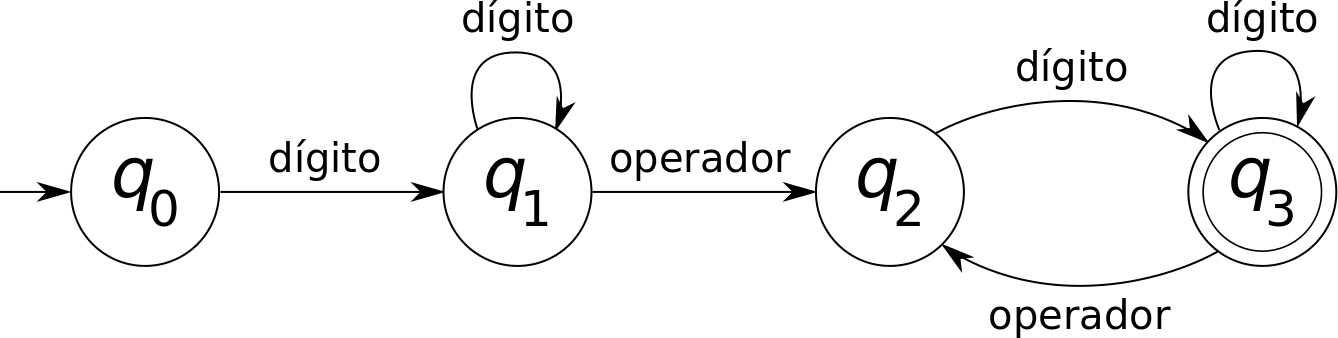

In [5]:
from IPython.display import Image
Image(filename='files/AFD3.png', width=600)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 3. Diagrama de transiciones del AFD 3</div>
</div>

In [9]:
dfa3 = DFA(
    states={'q0', 'q1', 'q2', 'q3'},
    input_symbols={'digito', 'operador'},
    transitions={
        'q0': {'digito': 'q1'},
        'q1': {'digito': 'q1', 'operador': 'q2'},
        'q2': {'digito': 'q3'},
        'q3': {'digito': 'q3', 'operador': 'q2'}
        
    },
    initial_state='q0',
    final_states={'q3'}
)

In [10]:
def val(x):
    if x in [str(d) for d in range(10)]:
        return 'digito'
    elif x in ['+','-','*','/']:
        return 'operador'
    
# linea de transformación
cadena = [ val(i) for i in '11+11+1*3-']

In [ ]:
checker(cadena,dfa3)

#### Implementando el autómata desde funciones y diccionarios

In [ ]:
def val(x):
    if x in [str(d) for d in range(10)]:
        return 'digito'
    elif x in ['+','-','*','/']:
        return 'operador'

transicion={
       ('q0','digito'):'q1',
       ('q1','digito'):'q1',
       ('q1','operador'):'q2',
       ('q2','digito'):'q3',
       ('q3','operador'):'q2',
       ('q3','digito'):'q3',
            }
estado_aceptacion=['q3'] # estado de aceptacion

def AFD3(cadena,estado_actual,transicion,estado_aceptacion): # se define la función
    if cadena == "": # cuando no encuentra nada
        return estado_actual in estado_aceptacion # si la cadena es ∅, entonces la función retorna True
    else:
        letra = cadena[0] # comienza con el primer caracter
        if(estado_actual,val(letra))in transicion:  # compara (estado_actual,letra) se encuentra en la tabla de transiciones
            estado_destino = transicion[(estado_actual,val(letra))]  # si es así, el estado destino tendra el nuevo valor estado
            cadena_restante = cadena[1:] # recorre los demás caracteres
            return AFD3(cadena_restante,estado_destino,transicion,estado_aceptacion) # recursividad
        else:
            return False # si la cadena no es aceptada por el autómata, retorna False

# Prueba:
print("Es aceptada?:",AFD3("12+32+4444*4888/7",'q0',transicion,estado_aceptacion))


- <b>Ejercicio en Clase</b><br>
AFD para búsqueda de cadenas**

Una de las aplicaciones más importantes de los AFD es la búsqueda de patrones en cadenas. Esta premisa es el corazón de los motores de búsqueda en internet como Google. El siguiente AFD es un ejemplo básico de una herramienta de este tipo sobre el alfabeto $\Sigma=\{a,b\}$. Acepta las cadenas de entrada que contengan el patrón $aabaaabb$ como una subcadena.

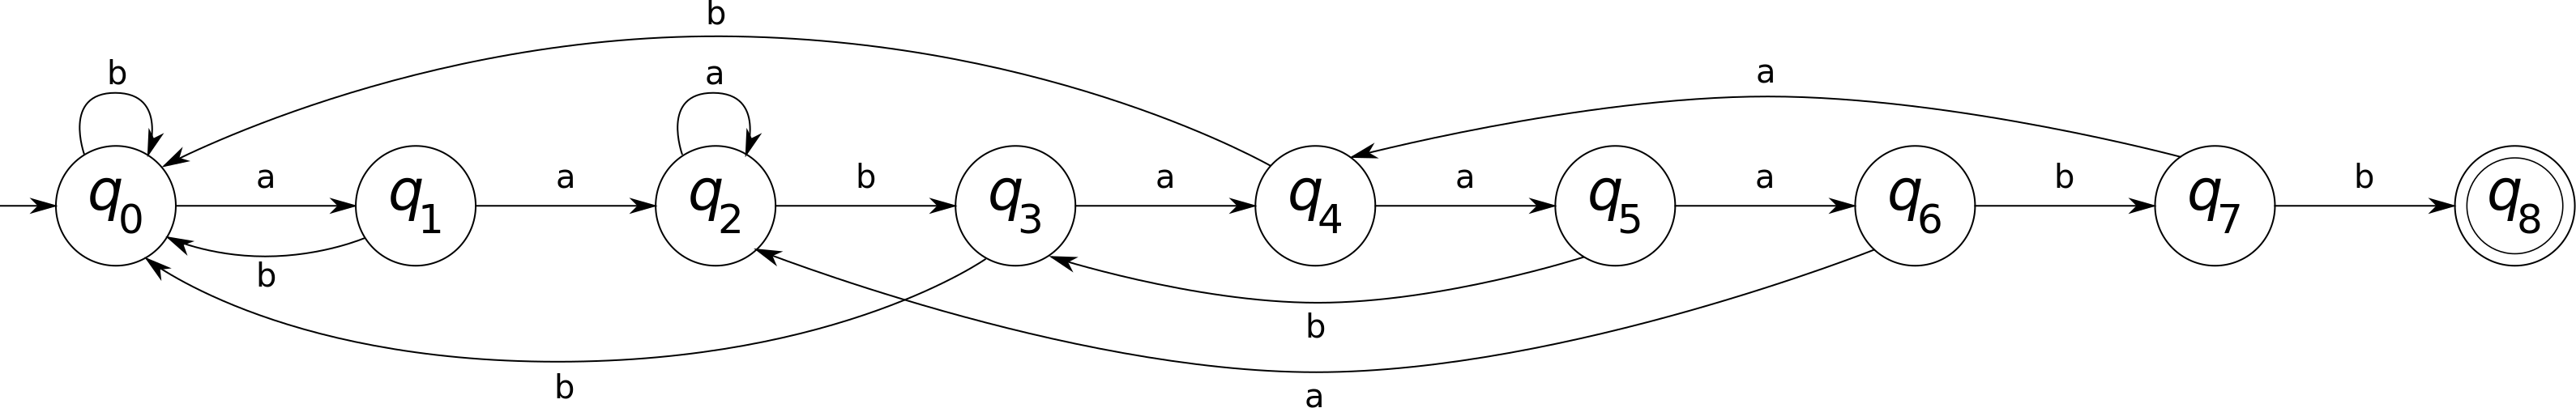

In [7]:
from IPython.display import Image
Image(filename='files/AFD2.png',width=900)


<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 3. Diagrama de transiciones del AFD 2</div>
</div>

** Implemente el autómata de la Fig 2 utilizando el esquema explicado anteriormente. **


** Compruebe su funcionamiento con la palabra: aaabaaabb **


In [ ]:
checker('aaabaaabb',dfa2)